In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data_batch_3
/kaggle/input/test_batch
/kaggle/input/data_batch_5
/kaggle/input/data_batch_4
/kaggle/input/data_batch_2
/kaggle/input/data_batch_1
/kaggle/input/batches.meta


In [2]:
#%tensorflow_version 1.x
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout,MaxPooling2D,Flatten,BatchNormalization,Conv2D,ZeroPadding2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.datasets import cifar10
import tensorflow as tf 

Using TensorFlow backend.


In [3]:
seed = 7
np.random.seed(seed)

In [4]:
cd /kaggle/input

/kaggle/input


In [5]:
import pickle
def load_cifar10_data(batch_number):
    with open('../input/data_batch_'+ str(batch_number), 'rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data']
    labels = batch['labels']
    return features, labels


In [6]:
batch_1, labels_1 = load_cifar10_data(1)
batch_2, labels_2 = load_cifar10_data(2)
batch_3, labels_3 = load_cifar10_data(3)
batch_4, labels_4 = load_cifar10_data(4)
batch_5, labels_5 = load_cifar10_data(5)

In [7]:
all_images = np.append(batch_1, batch_2, axis=0)
all_images = all_images.reshape((len(all_images), 3, 32, 32)).transpose(0,2,3,1)
all_labels = np.append(labels_1, labels_2, axis=0)


In [8]:
dict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
import matplotlib.pyplot as plt
def plot_image(number):
    
    fig = plt.figure(figsize = (15,8))
    plt.imshow(all_images[number])
    plt.title(dict[all_labels[number]])

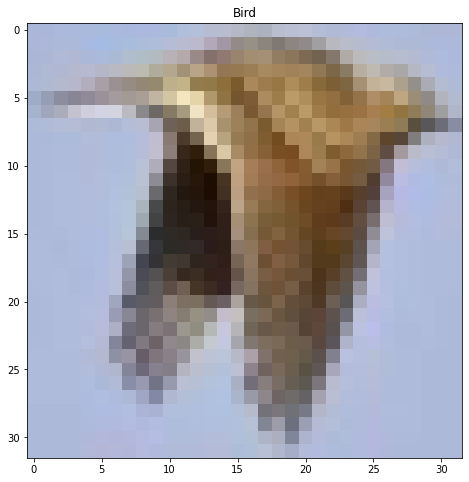

In [9]:
plot_image(123)

In [10]:
x_train = np.append(batch_1[0:8000], batch_2[0:8000], axis=0)
x_train = np.append(x_train, batch_3[0:8000], axis=0)
x_train = np.append(x_train, batch_4[0:8000], axis=0)
x_train = np.append(x_train, batch_5[0:8000], axis=0)
x_train.shape

(40000, 3072)

In [11]:
y_train = np.append(labels_1[0:8000], labels_2[0:8000], axis=0)
y_train = np.append(y_train, labels_3[0:8000], axis=0)
y_train = np.append(y_train, labels_4[0:8000], axis=0)
y_train = np.append(y_train, labels_5[0:8000], axis=0)
y_train.shape

(40000,)

In [12]:
x_validation = np.append(batch_1[8001:9000], batch_2[8001:9000], axis=0)
x_validation = np.append(x_validation, batch_3[8001:9000], axis=0)
x_validation = np.append(x_validation, batch_4[8001:9000], axis=0)
x_validation = np.append(x_validation, batch_5[8001:9000], axis=0)
x_validation.shape

(4995, 3072)

In [13]:
y_validation = np.append(labels_1[8001:9000], labels_2[8001:9000], axis=0)
y_validation = np.append(y_validation, labels_3[8001:9000], axis=0)
y_validation = np.append(y_validation, labels_4[8001:9000], axis=0)
y_validation = np.append(y_validation, labels_5[8001:9000], axis=0)
y_validation.shape

(4995,)

In [14]:
x_test = np.append(batch_1[9001:10000], batch_2[9001:10000], axis=0)
x_test = np.append(x_test, batch_3[9001:10000], axis=0)
x_test = np.append(x_test, batch_4[9001:10000], axis=0)
x_test = np.append(x_test, batch_5[9001:10000], axis=0)
x_test.shape

(4995, 3072)

In [15]:
y_test = np.append(labels_1[9001:10000], labels_2[9001:10000], axis=0)
y_test = np.append(y_test, labels_3[9001:10000], axis=0)
y_test = np.append(y_test, labels_4[9001:10000], axis=0)
y_test = np.append(y_test, labels_5[9001:10000], axis=0)
y_test.shape

(4995,)

In [16]:
input_shape = x_train.shape[1:]
print(x_train.shape[1:])  #we have to convert into 4d array for conv layer

(3072,)


In [17]:
x_train = x_train.reshape((len(x_train), 3, 32, 32)).transpose(0,2,3,1)
x_validation = x_validation.reshape((len(x_validation), 3, 32, 32)).transpose(0,2,3,1)
x_test = x_test.reshape((len(x_test), 3, 32, 32)).transpose(0,2,3,1)
print(x_train.shape[1:])

(32, 32, 3)


In [18]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_validation = to_categorical(y_validation, num_classes)
y_test = to_categorical(y_test, num_classes)

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow(x_train, y_train, batch_size=32)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow(x_validation, y_validation, batch_size=32)


In [20]:
#building the alex net architecture with 5 conv layers and 3 FC layers
l2_reg=0
model = Sequential()

#first conv layer
model.add(Conv2D(64,(7,7),input_shape = x_train.shape[1:],padding='same',kernel_regularizer=l2(l2_reg),activation='relu'))
model.add(Dropout(0.3))#
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#second cinv layer
model.add(Conv2D(128,(5,5),padding='same',activation='relu'))
model.add(Dropout(0.3))#
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#third conv layer
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


#fourth conv layer
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))#
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#fifth conv layer
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))#
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#first FC layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#second FC layer
model.add(Dense(1028, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#third FC layer
model.add(Dense(num_classes, activation=tf.nn.softmax))
model.add(BatchNormalization())

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        9472      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)      

In [21]:
#implementing callbacks
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint("cifar_alexnet_check_kaggle.h5",
                            monitor="val_loss",
                            mode="min",
                            save_best_only=True,
                            verbose=1)
early_stopping = EarlyStopping(monitor="val_loss",
                              min_delta=0,
                              patience=5,
                              verbose=1,
                              restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             min_delta=0.0001)
#putting callbacks in callbacks list
callbacks = [checkpoint,early_stopping,reduce_lr]
model.compile(loss="categorical_crossentropy",
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        9472      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)      

In [22]:
model.fit_generator(train_set,
                    steps_per_epoch=40000,epochs=20,
                    validation_data=(validation_set), validation_steps=4995, shuffle=True)

Epoch 1/20
40000/40000 [==============================] - 1573s 39ms/step - loss: 6.7465 - accuracy: 0.1018 - val_loss: 9.0664 - val_accuracy: 0.0955
Epoch 3/20
40000/40000 [==============================] - 1563s 39ms/step - loss: 6.9400 - accuracy: 0.1003 - val_loss: 10.0738 - val_accuracy: 0.0954
Epoch 9/20
40000/40000 [==============================] - 1508s 38ms/step - loss: 6.6477 - accuracy: 0.1004 - val_loss: 8.0590 - val_accuracy: 0.0957
Epoch 10/20
40000/40000 [==============================] - 1494s 37ms/step - loss: 6.9921 - accuracy: 0.1004 - val_loss: 8.0590 - val_accuracy: 0.0955
Epoch 11/20
40000/40000 [==============================] - 1491s 37ms/step - loss: 7.7490 - accuracy: 0.1004 - val_loss: 8.0590 - val_accuracy: 0.0954
Epoch 12/20
31516/40000 [======================>.......] - ETA: 5:04 - loss: 6.4669 - accuracy: 0.0994